In [173]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt #graphics

%matplotlib inline 

In [174]:
import requests #for api or web scrapping
from bs4 import BeautifulSoup #web scraping and parsing HTML and XML documents

DATA IMPORTING

In [175]:
# Load full dataset (posnataldata.csv)
from google.colab import files
uploaded = files.upload()

Saving postnataldata.csv to postnataldata (3).csv


In [176]:
import io
data = pd.read_csv(io.BytesIO(uploaded['postnataldata.csv']))
# Dataset is now stored in a Pandas Dataframe

In [177]:
#view count of rows and columns
data.shape

(1503, 11)

In [178]:
print(data.dtypes)

Timestamp                                    object
Age                                          object
Feeling sad or Tearful                       object
Irritable towards baby & partner             object
Trouble sleeping at night                    object
Problems concentrating or making decision    object
Overeating or loss of appetite               object
Feeling anxious                              object
Feeling of guilt                             object
Problems of bonding with baby                object
Suicide attempt                              object
dtype: object


To practice merging data, I've split the data set into two files and will proceed to upload them individually, the new datasets will also have an additional column called 'Annual income'

In [179]:
# Load dataset 1 (dataday1)
from google.colab import files
uploaded = files.upload()

Saving dataday1.csv to dataday1 (3).csv


In [180]:
import io
dayone = pd.read_csv(io.BytesIO(uploaded['dataday1.csv']))
# Dataset is now stored in a Pandas Dataframe

In [181]:
# Load dataset 2 (dataday2)
from google.colab import files
uploaded = files.upload()

Saving dataday2.csv to dataday2 (4).csv


In [182]:
import io
daytwo = pd.read_csv(io.BytesIO(uploaded['dataday2.csv']))
# Dataset is now stored in a Pandas Dataframe

Merging the two data sets with an outer join 

In [183]:
df = pd.merge(dayone, daytwo, how='outer')

In [184]:
#confirming the count of rows and columns is the same
df.shape

(1503, 12)

In [185]:
print(df.dtypes)

Timestamp                                    object
Age                                          object
Feeling sad or Tearful                       object
Irritable towards baby & partner             object
Trouble sleeping at night                    object
Problems concentrating or making decision    object
Overeating or loss of appetite               object
Feeling anxious                              object
Feeling of guilt                             object
Problems of bonding with baby                object
Suicide attempt                              object
Annual income                                 int64
dtype: object


In [186]:
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Annual income
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes,225924
1,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes,77601
2,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes,182156
3,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes,85974
4,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No,139788


Preparation - Data cleaning

In [187]:
# Convert the timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Change the date format to dd-mm
df['Timestamp'] = df['Timestamp'].dt.strftime('%d/%m/%Y')

# Print the modified DataFrame
print(df['Timestamp'])

0       14/06/2022
1       14/06/2022
2       14/06/2022
3       14/06/2022
4       14/06/2022
           ...    
1498    15/06/2022
1499    15/06/2022
1500    15/06/2022
1501    15/06/2022
1502    15/06/2022
Name: Timestamp, Length: 1503, dtype: object


In [188]:
# Finding missing values
df.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
Annual income                                 0
dtype: int64

In [189]:
#Checking total reponses by age group before removing missing values
pd.DataFrame(df.Age.value_counts())

,Age
40-45,364
35-40,349
30-35,338
45-50,271
25-30,181


In [190]:
# Drop the rows with missing values
df.dropna(inplace=True)

In [191]:
#Checking impacted age groups
pd.DataFrame(df.Age.value_counts())

,Age
40-45,358
35-40,343
30-35,338
45-50,271
25-30,181


In [192]:
# Sort by 'Annual Income' column in ascending order
df = df.sort_values('Annual income')

In [193]:
#Indexing
df.index

Int64Index([ 463, 1431,  439, 1226, 1075,  425, 1378,  741, 1037, 1201,
            ...
            1239, 1240,  635,  607,  671,   67,  300,  284,  804, 1377],
           dtype='int64', length=1491)

In [194]:
#Identifying the two responses with the lowest income using index and sorted data

df.set_index('Annual income').head(2)

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
Annual income,,,,,,,,,,,
10001,14/06/2022,35-40,Yes,Yes,No,Often,Not at all,Yes,Maybe,Sometimes,No
10060,15/06/2022,25-30,Yes,Yes,Two or more days a week,Yes,No,Yes,No,Sometimes,Yes


In [195]:
#Renaming columns with long name to facilitate analysis

df.rename(columns = {'Feeling sad or Tearful':'Sadness',
       'Irritable towards baby & partner':'Irritability', 'Trouble sleeping at night': 'Trouble Sleeping',
       'Problems concentrating or making decision':'Problems Focusing',
       'Overeating or loss of appetite': 'Appetite Issues', 'Feeling anxious': 'Anxiety', 'Feeling of guilt':'Guilt', 
       'Problems of bonding with baby':'Problems Bonding'},inplace = True)
df.head()

,Timestamp,Age,Sadness,Irritability,Trouble Sleeping,Problems Focusing,Appetite Issues,Anxiety,Guilt,Problems Bonding,Suicide attempt,Annual income
463,14/06/2022,35-40,Yes,Yes,No,Often,Not at all,Yes,Maybe,Sometimes,No,10001
1431,15/06/2022,25-30,Yes,Yes,Two or more days a week,Yes,No,Yes,No,Sometimes,Yes,10060
439,14/06/2022,30-35,No,No,Yes,Yes,Yes,Yes,Maybe,No,Yes,10336
1226,15/06/2022,45-50,Yes,No,No,Often,Yes,Yes,No,Sometimes,No,10368
1075,15/06/2022,35-40,Yes,No,Two or more days a week,No,Not at all,Yes,No,Sometimes,Yes,10609


In [196]:
# replace "Not at all" with "No" as it is repetitive
df['Appetite Issues'] = df['Appetite Issues'].replace('Not at all', 'No')

For Loop

In [197]:

# Initialize a list to store the values of the 'Hospital' column
hospital_list = []

# Loop over the rows of the DataFrame
for index, row in df.iterrows():
    # Check if the 'Age' column is not empty
    if pd.notnull(row['Age']):
        # If the 'Age' column is not empty, set the value of 'Hospital' to a constant string
        hospital_list.append("Coombe Women's Hospital")
    else:
        # If the 'Age' column is empty, set the value of 'Hospital' to NaN
        hospital_list.append(pd.NaT)

# Add the 'Hospital' column to the DataFrame
df['Hospital'] = hospital_list

df.head()

,Timestamp,Age,Sadness,Irritability,Trouble Sleeping,Problems Focusing,Appetite Issues,Anxiety,Guilt,Problems Bonding,Suicide attempt,Annual income,Hospital
463,14/06/2022,35-40,Yes,Yes,No,Often,No,Yes,Maybe,Sometimes,No,10001,Coombe Women's Hospital
1431,15/06/2022,25-30,Yes,Yes,Two or more days a week,Yes,No,Yes,No,Sometimes,Yes,10060,Coombe Women's Hospital
439,14/06/2022,30-35,No,No,Yes,Yes,Yes,Yes,Maybe,No,Yes,10336,Coombe Women's Hospital
1226,15/06/2022,45-50,Yes,No,No,Often,Yes,Yes,No,Sometimes,No,10368,Coombe Women's Hospital
1075,15/06/2022,35-40,Yes,No,Two or more days a week,No,No,Yes,No,Sometimes,Yes,10609,Coombe Women's Hospital


Creating a custom function

In [198]:
#This custom function will change the date format from DD/MM/YYYY to MM/DD/YYYY

# Define the function to change the date format
def change_date_format(date_string):
    # Split the date string into day, month, and year
    day, month, year = date_string.split('/')

    # Return the date string in mm/dd/yyyy format
    return f"{month}/{day}/{year}"

# Apply the function to the timestamp column
df['Timestamp'] = df['Timestamp'].apply(change_date_format)

# Print the updated column
print(df['Timestamp'])

463     06/14/2022
1431    06/15/2022
439     06/14/2022
1226    06/15/2022
1075    06/15/2022
           ...    
67      06/14/2022
300     06/14/2022
284     06/14/2022
804     06/15/2022
1377    06/15/2022
Name: Timestamp, Length: 1491, dtype: object


Data Analysis

In [199]:
#Using group by to explore each variable

sadness = df.groupby("Sadness").Age.value_counts(normalize=True)

sadness.unstack().style.format('{:.0%}')



Age,25-30,30-35,35-40,40-45,45-50
Sadness,,,,,
No,12%,22%,21%,29%,16%
Sometimes,14%,23%,21%,18%,24%
Yes,11%,23%,26%,24%,16%


In [200]:
irritability = df.groupby("Irritability").Age.value_counts(normalize=True)

irritability.unstack().style.format('{:.0%}')

Age,25-30,30-35,35-40,40-45,45-50
Irritability,,,,,
No,15%,24%,21%,18%,22%
Sometimes,12%,21%,25%,27%,16%
Yes,10%,23%,24%,27%,16%


In [201]:
sleep = df.groupby("Trouble Sleeping").Age.value_counts(normalize=True)

sleep.unstack().style.format('{:.0%}')

Age,25-30,30-35,35-40,40-45,45-50
Trouble Sleeping,,,,,
No,9%,26%,20%,23%,22%
Two or more days a week,11%,23%,20%,27%,18%
Yes,16%,19%,30%,20%,14%


In [202]:
appetite = df.groupby("Appetite Issues").Age.value_counts(normalize=True)

appetite.unstack().style.format('{:.0%}')

Age,25-30,30-35,35-40,40-45,45-50
Appetite Issues,,,,,
No,11%,20%,22%,26%,21%
Yes,16%,30%,25%,18%,10%


In [203]:
anxiety = df.groupby("Anxiety").Age.value_counts(normalize=True)

anxiety.unstack().style.format('{:.0%}')

Age,25-30,30-35,35-40,40-45,45-50
Anxiety,,,,,
No,15%,22%,23%,26%,15%
Yes,11%,23%,23%,23%,20%


In [204]:
guilt = df.groupby("Guilt").Age.value_counts(normalize=True)

guilt.unstack().style.format('{:.0%}')

Age,25-30,30-35,35-40,40-45,45-50
Guilt,,,,,
Maybe,12%,23%,20%,23%,22%
No,10%,24%,21%,27%,18%
Yes,17%,20%,31%,20%,12%


In [205]:
bonding = df.groupby("Problems Bonding").Age.value_counts(normalize=True)

bonding.unstack().style.format('{:.0%}')

Age,25-30,30-35,35-40,40-45,45-50
Problems Bonding,,,,,
No,12%,19%,22%,29%,17%
Sometimes,13%,26%,24%,17%,20%
Yes,11%,23%,22%,26%,18%


In [206]:
suicide = df.groupby("Suicide attempt").Age.value_counts(normalize=True)

suicide.unstack().style.format('{:.0%}')


Age,25-30,30-35,35-40,40-45,45-50
Suicide attempt,,,,,
No,10%,22%,23%,23%,22%
Not interested to say,15%,24%,19%,24%,18%
Yes,13%,22%,26%,25%,13%


In [207]:
#Using Numpy on Annual income data

# Extract the 'Annual income' column as a NumPy array
income = df['Annual income'].to_numpy()

# Find the mean, median, and standard deviation of the column
mean_income = np.mean(income)
median_income = np.median(income)
std_income = np.std(income)

# Print the results
print(f"Mean annual income: {mean_income:.2f}")
print(f"Median annual income: {median_income:.2f}")
print(f"Standard deviation of annual income: {std_income:.2f}")


Mean annual income: 129505.97
Median annual income: 130294.00
Standard deviation of annual income: 69205.17


In [208]:
#Using Numpy to find the quartiles

# Find the minimum and maximum values
min_income = np.min(income)
max_income = np.max(income)

# Find the quartiles
q1_income, q2_income, q3_income = np.percentile(income, [25, 50, 75])

# Print the results
print(f"Minimum annual income: {min_income:.2f}")
print(f"Maximum annual income: {max_income:.2f}")
print(f"First quartile of annual income: {q1_income:.2f}")
print(f"Second quartile (median) of annual income: {q2_income:.2f}")
print(f"Third quartile of annual income: {q3_income:.2f}")

Minimum annual income: 10001.00
Maximum annual income: 249897.00
First quartile of annual income: 69131.50
Second quartile (median) of annual income: 130294.00
Third quartile of annual income: 186527.50


In [209]:
#The above information can also be obtaines using the method describe
df.describe()


,Annual income
count,1491.000000
mean,129505.969148
std,69228.391687
min,10001.000000
25%,69131.500000
50%,130294.000000
75%,186527.500000
max,249897.000000


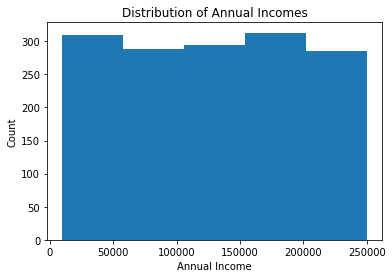

In [210]:
#Using Matplotlib to create an histogram of the Annual income

# Create a histogram with 5 bins
plt.hist(df['Annual income'], bins=5)

# Add labels and title
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Incomes')

# Display the chart
plt.show()

Text(0.5, 1.0, 'Mother Age Groups')

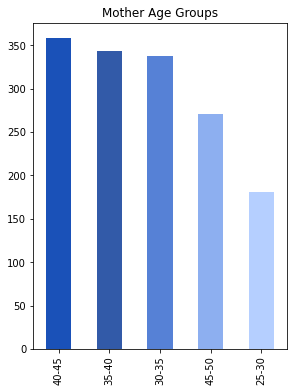

In [211]:
#Visualizing some variables

plt.figure(figsize=(10,6))

plt.subplot(1,2,2);df.Age.value_counts().plot(kind='bar', color=['#1a51b8', '#325aa8','#5681d6','#8daff0','#b5cfff']); plt.title('Mother Age Groups')

In [212]:
#Correlation between income and having answered 'Yes' to 5+ variables

# create a list of columns that have "Yes" answers
yes_cols = ['Sadness', 'Irritability', 'Trouble Sleeping', 'Problems Focusing', 'Appetite Issues', 'Anxiety', 'Guilt', 'Problems Bonding', 'Suicide attempt']

# count the number of "yes" answers in each row for the selected columns
df['Yes_Count'] = df[yes_cols].apply(lambda row: (row == 'Yes').sum(), axis=1)

# create a new column that indicates if the row has 5 or more "yes" answers
df['yes_count_5_or_more'] = df['Yes_Count'] >= 5

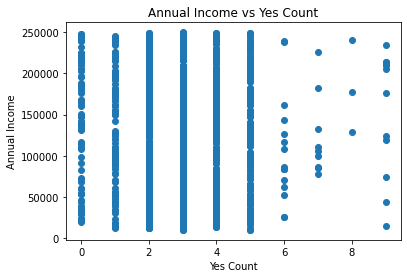

In [213]:
# create a scatter plot of 'annual income' vs 'yes_count'
plt.scatter(df['Yes_Count'], df['Annual income'])

# add labels and title to the plot
plt.xlabel('Yes Count')
plt.ylabel('Annual Income')
plt.title('Annual Income vs Yes Count')

# show the plot
plt.show()


In [214]:
# Create a new dataframe that groups the original dataframe by age and calculates the percentage of people with 5 or more 'Yes' responses in each age group
result_yes = df.groupby('Age').apply(lambda x: '{:.2f}%'.format((x['Yes_Count'] >= 5).mean() * 100))

# Print the result
print(result_yes)

Age
25-30    12.15%
30-35    11.54%
35-40    25.36%
40-45    13.97%
45-50     8.12%
dtype: object


In [215]:
# Create a new column 'No_Count' that contains the number of 'No' responses for each person
df['No_Count'] = (df == 'No').sum(axis=1)

# Create a new dataframe that groups the original dataframe by age and calculates the percentage of people with 5 or more 'No' responses in each age group
result_no = df.groupby('Age')['No_Count'].apply(lambda x: '{:.2f}%'.format((x >= 4).mean() * 100))

# Print the result
print(result_no)

Age
25-30    64.64%
30-35    63.91%
35-40    53.94%
40-45    64.53%
45-50    73.06%
Name: No_Count, dtype: object


Practice web scrapping

In [216]:
# URL of the Wikipedia page with the table
url = 'https://en.wikipedia.org/wiki/Evolutionary_approaches_to_postpartum_depression'

# Send a request to the URL and get the HTML content
page = requests.get(url).content

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(page, 'html.parser')

# Find the table by its class
table = soup.find('table', {'class': 'wikitable'})

# Convert the table into a pandas dataframe
tabledf = pd.read_html(str(table))[0]

# Convert the dataframe into a list of dictionaries
dic = tabledf.to_dict('records')

# Display the list of dictionaries
print(dic)
print(tabledf)

[{'Risk factors for postpartum depression': 'low SES'}, {'Risk factors for postpartum depression': 'low social support'}, {'Risk factors for postpartum depression': 'birth complications'}, {'Risk factors for postpartum depression': 'low infant birth weight'}, {'Risk factors for postpartum depression': 'preterm birth'}, {'Risk factors for postpartum depression': 'unplanned pregnancy'}, {'Risk factors for postpartum depression': 'previous depressive episodes'}, {'Risk factors for postpartum depression': 'bottle feeding'}, {'Risk factors for postpartum depression': 'anxiety'}, {'Risk factors for postpartum depression': 'stressful life events'}, {'Risk factors for postpartum depression': 'domestic violence'}, {'Risk factors for postpartum depression': 'nutrient deficiency'}, {'Risk factors for postpartum depression': 'negative attitude toward pregnancy'}, {'Risk factors for postpartum depression': 'poor relationship satisfaction'}, {'Risk factors for postpartum depression': 'difficult infa